## Credit Card Fraud Detection - Capstone Project

In this project we will predict fraudulent credit card transactions with the help of Machine learning models. 

The objective of this project is to provide best machine learning model on the given Kaggle dataset which has the maximum ROC_AUC_score. 

Action Points:
1.	Perform EDA and handle data imbalance.
2.	Do a manual test and train split.
3.	Decide the class of model which will work on our train test split.
4.	Evaluate different models.
5.	Provide recommendations based on our evaluation



### Contributors : Rajat Ranka, Kirti Singhania

#### Python version : 3, Platform : Nimblebox GPU, Google Colab

## Understanding the DataSet:

In the training dataset, out of 284,807 transactions, only 492 are fraudulent hence 99.83% transactions are not fraudulent, only .017% are fraudulent. Except for time and amount, all other data has been prepared with PCA. We have to standardize time and amount also because certain machine learning algorithms like KNN and logistics regression might not work correctly. Need for check for missing values as well and do missing value imputation.

In [1]:
##Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

## Exploratory data analysis

In [2]:
#Load and read the dataset
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Here we will observe the distribution of our classes

In [31]:
#observe the different feature type present in the data and calculate percentage share of fraud vs non-fraud data
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share,fraud_share)

99.82725143693798 0.1727485630620034


(0, 100)

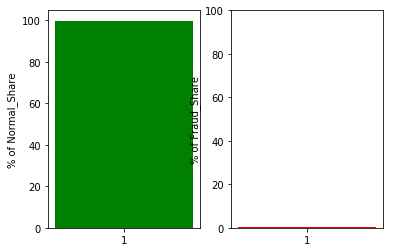

In [5]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.subplot(1,2,1)
plt.bar(x = "1",height = normal_share,color = "g")
plt.ylabel("% of Normal_Share")
plt.subplot(1,2,2)
plt.bar(x="1",height = fraud_share,color = "r")
plt.ylabel("% of Fraud_Share")
plt.ylim(0,100)

### We can see that the data is highly imbalanced

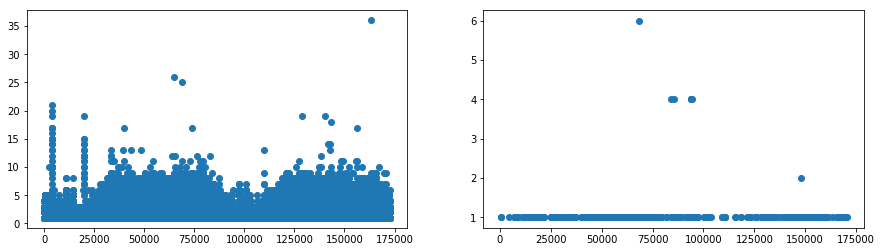

In [6]:
# Create a scatter plot to observe the distribution of classes with time
k = df[df["Class"]==0].groupby("Time").count()
plt.figure(figsize = [15,4])
plt.subplot(1,2,1)
plt.scatter(k.index,k["Class"])
l = df[df["Class"]==1].groupby("Time").count()
plt.subplot(1,2,2)
plt.scatter(l.index,l["Class"])
#distribution of normal class over time shows a cosine curve thus representing a seasonal behaviour

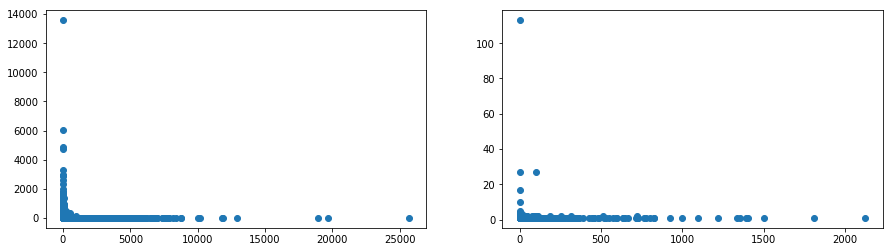

In [7]:
# Create a scatter plot to observe the distribution of classes with Amount
m = df[df["Class"]==0].groupby("Amount").count()
plt.figure(figsize = [15,4])
plt.subplot(1,2,1)
plt.scatter(m.index,m["Class"])
n = df[df["Class"]==1].groupby("Amount").count()
plt.subplot(1,2,2)
plt.scatter(n.index,n["Class"])
#distribution of normal class over amount shows that fraud transaction occurs more on smaller amount than on higher amount

In [10]:
# Checking the percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)


Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

### There are no null values

In [11]:
# Scale "Time" and "Amount"
from sklearn.preprocessing import StandardScaler, RobustScaler
df['scaled_amount'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

# Make a new dataset named "df_scaled" dropping out original "Time" and "Amount"
df_scaled = df.drop(['Time','Amount'],axis = 1,inplace=False)
df_scaled.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [12]:
#Renaming dataframe to original names
df_scaled.rename(columns = {'scaled_amount':'Amount', 'scaled_time':'Time'}, inplace = True)
df = df_scaled
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount,Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [13]:
#Using PCA for the most important variables
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)
pca.fit(df.drop(columns=["Time","Class"]))


PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [14]:
pca.components_

array([[-1.40696518e-01, -2.49835057e-01, -8.77373101e-02,
         3.74253155e-02, -1.41602941e-01,  7.56014882e-02,
         1.26628136e-01, -3.14577235e-02, -1.22094440e-02,
        -2.77138634e-02,  2.63203689e-05, -2.35663787e-03,
         1.30145240e-03,  7.94892974e-03, -6.67361837e-04,
        -8.32132335e-04,  1.50269278e-03,  7.22301007e-03,
        -1.10161889e-02,  6.27417474e-02,  1.85942459e-02,
        -1.12200924e-02, -1.66142053e-02,  7.34998898e-04,
        -5.84005766e-03, -3.61283294e-04,  2.70362287e-03,
         7.83794151e-04,  9.27364982e-01],
       [-9.71465172e-01,  2.00116577e-01,  5.11391083e-02,
        -1.85461694e-02,  6.68902325e-02, -3.36924270e-02,
        -5.11569780e-02,  1.22359539e-02,  4.41115402e-03,
         9.94505088e-03, -9.03963034e-06,  7.99157868e-04,
        -4.40336245e-04, -2.63524187e-03,  2.16365644e-04,
         2.64803724e-04, -4.72451523e-04, -2.25999090e-03,
         3.41215584e-03, -1.91068923e-02, -5.58789246e-03,
         3.36

In [15]:
pca.explained_variance_ratio_

array([0.32856878, 0.08688211, 0.05644532, 0.0511104 , 0.04654249,
       0.04213911, 0.03864742, 0.03333006, 0.02820122, 0.02784445,
       0.02425914, 0.02325199, 0.02306644, 0.02148316, 0.01951023,
       0.01893977, 0.01787664, 0.01679473, 0.01631858, 0.01537595,
       0.0126696 , 0.01229441, 0.00936039, 0.0085414 , 0.00639867,
       0.00541503, 0.00384441, 0.00256703, 0.00232111])

<function matplotlib.pyplot.show(*args, **kw)>

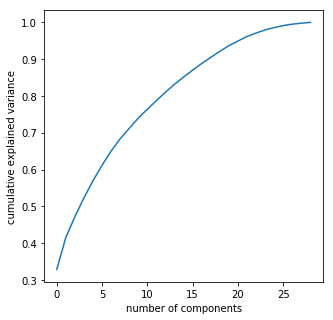

In [16]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show

### Here we can see that most variance is explained in first 6 components hence using Incremental PCA using first 6 variables

In [17]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=6)

In [18]:
df_pca = pca_final.fit_transform(df.drop(columns = ["Time","Class"]))
df_pca_frame = pd.DataFrame(df_pca)
df_pca_frame.head()

,0,1,2,3,4,5
0,0.942536,-1.178131,-0.870333,2.523826,0.703187,0.000232
1,-1.370430,1.021048,0.270881,0.340091,-0.014860,-0.350153
2,4.498347,-0.591002,-1.298523,1.245888,0.366357,-0.015926
3,0.591053,-0.811798,-1.381200,0.253190,0.671843,0.165512
4,-0.293291,-1.326447,-0.080928,1.431827,1.107275,0.522687


### Splitting the data into train & test data

In [19]:
y= df["Class"]
x = df_pca_frame

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 41)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [21]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
348
144


### Plotting the distribution of a variable

(array([1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 1.9000e+01, 1.7000e+01, 4.0000e+01, 4.9000e+01,
        5.5000e+01, 1.3300e+02, 5.0900e+02, 6.6650e+03, 2.5081e+04,
        1.1932e+05, 4.6302e+04, 1.0690e+03, 7.1000e+01, 2.1000e+01,
        3.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-30.03220703, -28.09902852, -26.16585001, -24.23267149,
        -22.29949298, -20.36631447, -18.43313596, -16.49995744,
        -14.56677893, -12.63360042, -10.7004219 ,  -8.76724339,
         -6.83406488,  -4.90088637,  -2.96770785,  -1.03452934,
          0.89864917,   2.83182769,   4.7650062 ,   6.69818471,
          8.63136323,  10.56454174,  12.49772025,  14.43089876,
         16.36407728,  18.29725579,  20.2304343 ,  22.16361282,
         24.09679133,  26.02996984,  27.96314835]),
 <a list of 30 Patch objects>)

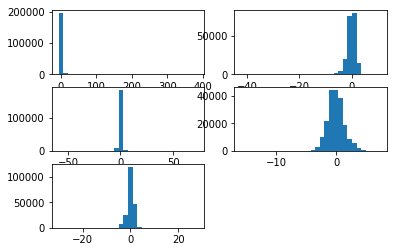

In [22]:
# plot the histogram of a variable from the dataset to see the skewness
plt.subplot(3,2,1)
plt.hist(X_train[0],bins =30)
plt.subplot(3,2,2)
plt.hist(X_train[1],bins =30)
plt.subplot(3,2,3)
plt.hist(X_train[2],bins =30)
plt.subplot(3,2,4)
plt.hist(X_train[3],bins =30)
plt.subplot(3,2,5)
plt.hist(X_train[4],bins = 30)

### Here we can see that most data is Gaussian

## Model Building
- Build different models on the imbalanced dataset and see the result

### 1. Logistic Regression Model

In [23]:
# Logistic Regression
from sklearn import linear_model #import the package
import statsmodels.api as sm
logistic = linear_model.LogisticRegression(solver='liblinear')
res = logistic.fit(X_train,y_train)
res.score(X_train,y_train)

0.9987660761220681

In [24]:
#perform cross validation
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(logistic,X_train, y_train, cv=6)
print("Cross-validated scores:", scores)



Cross-validated scores: [0.99867582 0.99852534 0.99891654 0.99879616 0.99885635 0.99873597]


In [25]:
#Building Logistic Regression Model with tunning of hyperparameter
#perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid_logit = GridSearchCV(estimator=logistic,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1)
grid_logit_result = grid_logit.fit(X_train, y_train)

print('Best Score: ', grid_logit_result.best_score_)
print('Best Params: ', grid_logit_result.best_params_)
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, grid_logit_result.predict(X_test))
print(confusion)
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

TP/(TP+FN)
# Calculate the specificity

TN/(TN+FP)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


C:\Users\kirti singhania\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:  7.5min finished


Best Score:  0.9589100789825746
Best Params:  {'C': 0.0001, 'class_weight': {1: 0.7, 0: 0.3}, 'penalty': 'l2', 'solver': 'saga'}
[[85295     4]
 [  122    22]]


C:\Users\kirti singhania\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.9999531061325455

### 2. KNN Model

In [ ]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train,y_train)

In [ ]:
#Building knn with tunning of hyperparameter
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
grid_knn = GridSearchCV(neigh, 
                   hyperparameters, cv=5)
grid_knn_result = grid_knn.fit(X_train,y_train)
print('Best Score: ', grid_knn_result.best_score_)
print('Best Params: ', grid_knn_result.best_params_)
confusion = metrics.confusion_matrix(y_test, grid_knn_result.predict(X_test))
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

TP/(TP+FN)
# Calculate the specificity

TN/(TN+FP)

### 3.SVC Model

In [ ]:
#svc model
from sklearn.svm import SVC
svc_clas = SVC(gamma='auto')
svc_clas.fit(X_train,y_train)

In [ ]:
#Building svc Model with tunning of hyperparameter
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid_svc = GridSearchCV(svc_clas, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_svc_result = grid_svc.fit(X_train, y_train) 
print('Best Score: ', grid_svc_result.best_score_)
print('Best Params: ', grid_svc_result.best_params_)
confusion = metrics.confusion_matrix(y_test, grid_svc_result.predict(X_test))
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

TP/(TP+FN)
# Calculate the specificity

TN/(TN+FP)

### 4. Decision Tree Model

In [32]:
#Decision tree model
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier()
estimator.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
#Building decision_tree Model with tunning of hyperparameter
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
grid_decision_tree = GridSearchCV(estimator, param_grid, cv=5)
grid_decision_tree_result = grid_decision_tree.fit(X_train, y_train)
print('Best Score: ', grid_decision_tree_result.best_score_)
print('Best Params: ', grid_decision_tree_result.best_params_)
confusion = metrics.confusion_matrix(y_test, grid_decision_tree_result.predict(X_test))
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

TP/(TP+FN)
# Calculate the specificity

TN/(TN+FP)

Best Score:  0.9990419534118496
Best Params:  {'criterion': 'gini', 'max_depth': 6}
[[85281    18]
 [   72    72]]


0.9997889775964548

### 5. Random Forest Model

In [34]:
#Randomforest model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


C:\Users\kirti singhania\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
#Building Randomforest Model with tunning of hyperparameter
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid_random_forest = GridSearchCV(clf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
grid_random_forest_result = grid_random_forest.fit(X_train, y_train)

print('Best Score: ', grid_random_forest_result.best_score_)
print('Best Params: ', grid_random_forest_result.best_params_)
confusion = metrics.confusion_matrix(y_test, grid_random_forest_result.predict(X_test))
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

TP/(TP+FN)
# Calculate the specificity

TN/(TN+FP)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

### Hence we have explored 5 algorithms by building models like:

- KNN
- SVC
- Decision Tree
- Random Forest
- Logistic Regression


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
clf_new = grid_random_forest()  #initialise the model with optimum hyperparameters
clf_new.fit(X_train, y_train)
print --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Here we will perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

In [ ]:
#Importing necessary libraries
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

### Random Oversampling

### 6. Logistic Regression Using Random Oversampling

In [ ]:
#Building Logistic Regression Model On Randomoversampled Data set
X_tain_resam , y_train_resam = ros.fit_resample(X_train , y_train)
#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
#perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid_logit_rand_over = GridSearchCV(estimator=logistic,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1)
grid_logit_rand_over_result = grid_logit_rand_over.fit(X_train_resam,y_train_resam)

print('Best Score: ', grid_logit_rand_over_result.best_score_)
print('Best Params: ', grid_logit_rand_over_result.best_params_)

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric
confusion = metrics.confusion_matrix(y_test, grid_logit_rand_over_result.predict(X_test))
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(TP/(TP+FN))
# Calculate the specificity

print(TN/(TN+FP))

#print the optimum value of hyperparameters


### 7. KNN Alogorithm Using Random Oversampling

In [ ]:
#Building knn Model On Randomoversampled Data set
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
grid_knn_rand_over = GridSearchCV(neigh, 
                   hyperparameters, cv=5)
grid_knn_rand_over_result = grid_knn_rand_over.fit(X_train_resam,y_train_resam)
print('Best Score: ', grid_knn_rand_over_result.best_score_)
print('Best Params: ', grid_knn_rand_over_result.best_params_)
#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric
confusion = metrics.confusion_matrix(y_test, grid_knn_rand_over_result.predict(X_test))
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(TP/(TP+FN))
# Calculate the specificity

print(TN/(TN+FP))

#print the optimum value of hyperparameters


### 8. Support Vector Machine Using Random Oversampling

In [ ]:
#Building svm Model On Randomoversampled Data set
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid_svc_rand_over = GridSearchCV(svc_clas, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_svc_rand_over_result = grid_svc_rand_over.fit(X_train_resam, y_train_resam) 
print('Best Score: ', grid_svc_rand_over_result.best_score_)
print('Best Params: ', grid_svc_rand_over_result.best_params_)

#print the evaluation result by choosing a evaluation metric
confusion = metrics.confusion_matrix(y_test, grid_svc_rand_over_result.predict(X_test))
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(TP/(TP+FN))
# Calculate the specificity

print(TN/(TN+FP))

#print the optimum value of hyperparameters

### 9. Decision Tree Using Random Oversampling

In [ ]:
#Building decision tree Model On Randomoversampled Data set
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
grid_decision_tree_rand_over = GridSearchCV(estimator, param_grid, cv=5)
grid_decision_tree_rand_over_result = grid_decision_tree_rand_over.fit(X_train_resam, y_train_resam)
print('Best Score: ', grid_decision_tree_rand_over_result.best_score_)
print('Best Params: ', grid_decision_tree_rand_over_result.best_params_)
confusion = metrics.confusion_matrix(y_test, grid_decision_tree_rand_over_result.predict(X_test))
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

TP/(TP+FN)
# Calculate the specificity

TN/(TN+FP)

### 10. Random Forest Model Using Random Oversampling

In [ ]:
#Building Random Forest Model On Randomoversampled Data set
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid_random_forest_rand_over = GridSearchCV(clf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
grid_random_forest_rand_over_result = grid_random_forest_rand_over.fit(X_train_resam, y_train_resam)

print('Best Score: ', grid_random_forest_rand_over_result.best_score_)
print('Best Params: ', grid_random_forest__rand_over_result.best_params_)

#print the evaluation result by choosing a evaluation metric
confusion = metrics.confusion_matrix(y_test, grid_random_forest_rand_over_result.predict(X_test))
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(TP/(TP+FN))
# Calculate the specificity

print(TN/(TN+FP))

#print the optimum value of hyperparameters

### SMOTE

### Print the class distribution after applying SMOTE 

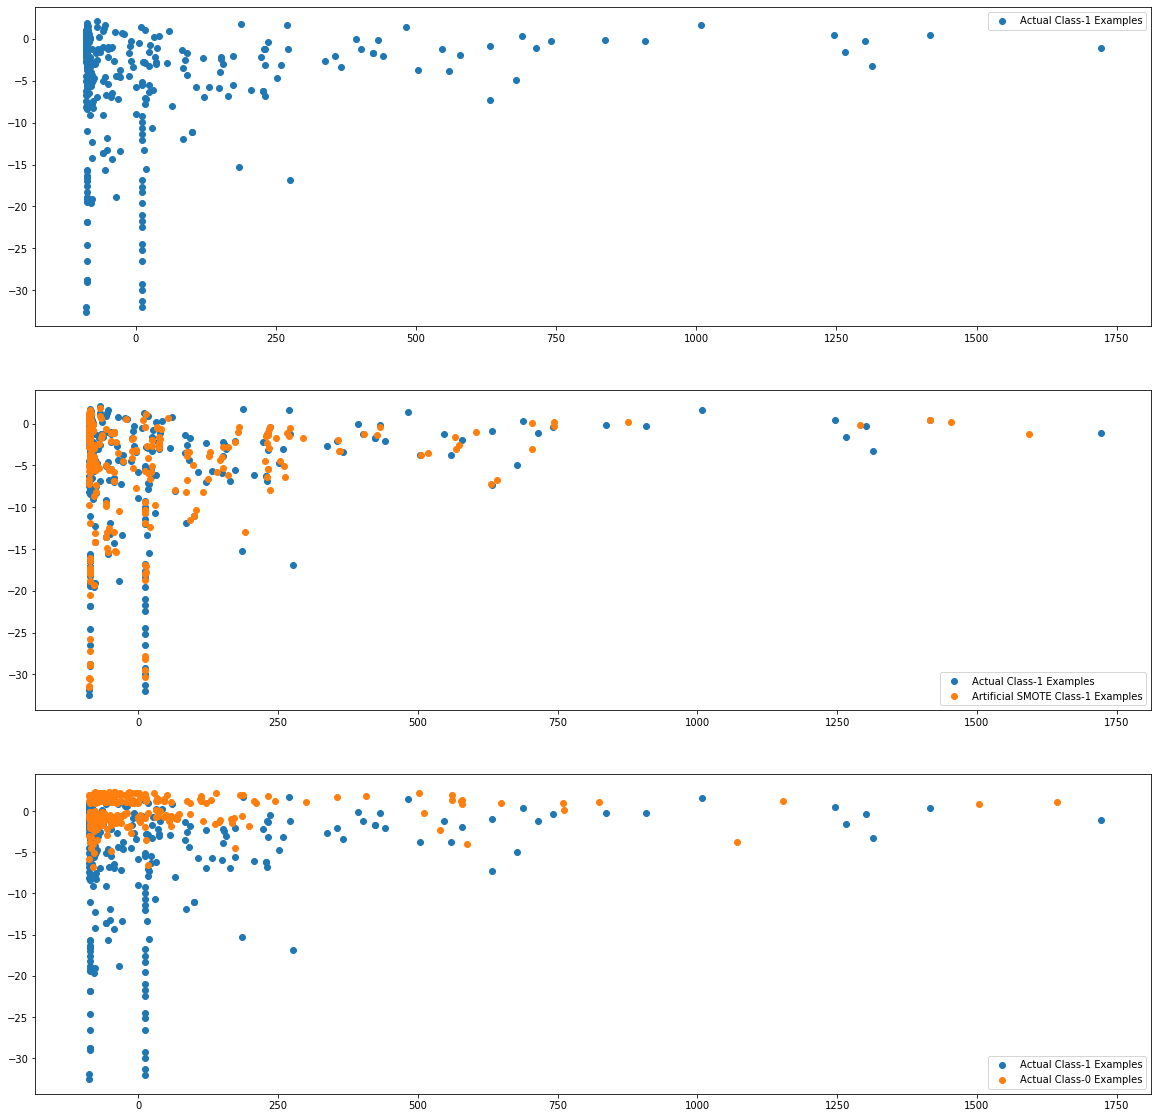

In [26]:
import warnings
warnings.filterwarnings("ignore")


sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### 11. Logistic Regression Using SMOTE

In [ ]:
#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
#perform hyperparameter tuning
#Building Logistic Regression Model with hyperparameter tuning on SMOTE Data Set
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid_logit_smote = GridSearchCV(estimator=logistic,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1)
grid_logit_smote_result = grid_logit_smote.fit(X_train_smote,y_train_smote)

print('Best Score: ', grid_logit_smote_result.best_score_)
print('Best Params: ', grid_logit_smote_result.best_params_)

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric
confusion = metrics.confusion_matrix(y_test, grid_logit_smote_result.predict(X_test))
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(TP/(TP+FN))
# Calculate the specificity

print(TN/(TN+FP))

#print the optimum value of hyperparameters


### 12. K Nearest Neighbours Using SMOTE

In [ ]:
#Building knn with hyperparameter tuning on SMOTE Data Setleaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
grid_knn_smote = GridSearchCV(neigh, 
                   hyperparameters, cv=5)
grid_knn_smote_result = grid_knn_smote.fit(X_train_smote,y_train_smote)
print('Best Score: ', grid_knn_smote_result.best_score_)
print('Best Params: ', grid_knn_smote_result.best_params_)
#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric
confusion = metrics.confusion_matrix(y_test, grid_knn_smote_result.predict(X_test))
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(TP/(TP+FN))
# Calculate the specificity

print(TN/(TN+FP))

#print the optimum value of hyperparameters


### 13. SVM Using SMOTE

In [ ]:
# defining parameter range 
#Building svc with hyperparameter tuning on SMOTE Data Set
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid_svc_smote = GridSearchCV(svc_clas, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_svc_smote_result = grid_svc_smote.fit(X_train_smote, y_train_smote) 
print('Best Score: ', grid_svc_smote_result.best_score_)
print('Best Params: ', grid_svc_smote_result.best_params_)

#print the evaluation result by choosing a evaluation metric
confusion = metrics.confusion_matrix(y_test, grid_svc_smote_result.predict(X_test))
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(TP/(TP+FN))
# Calculate the specificity

print(TN/(TN+FP))

#print the optimum value of hyperparameters

### 14. Decision Tree Using SMOTE

In [ ]:
#Building decision tree Model with hyperparameter tuning on SMOTE Data Set
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
grid_decision_tree_smote = GridSearchCV(estimator, param_grid, cv=5)
grid_decision_tree_smote_result = grid_decision_tree_smote.fit(X_train_smote, y_train_smote)
print('Best Score: ', grid_decision_tree_smote_result.best_score_)
print('Best Params: ', grid_decision_tree_smote_result.best_params_)
confusion = metrics.confusion_matrix(y_test, grid_decision_smote_result.predict(X_test))
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

TP/(TP+FN)
# Calculate the specificity

TN/(TN+FP)

### 15. Random Forest Using SMOTE

In [ ]:
#Building randomforest Model with hyperparameter tuning on SMOTE Data Set
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid_random_forest_smote = GridSearchCV(clf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
grid_random_forest_smote_result = grid_random_forest_smote.fit(X_train_smote, y_train_smote)

print('Best Score: ', grid_random_forest_smote_result.best_score_)
print('Best Params: ', grid_random_forest_smote_result.best_params_)

#print the evaluation result by choosing a evaluation metric
confusion = metrics.confusion_matrix(y_test, grid_random_forest_smote_result.predict(X_test))
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(TP/(TP+FN))
# Calculate the specificity

print(TN/(TN+FP))

#print the optimum value of hyperparameters

##### Build models on other algorithms to see the better performing on SMOTE

### ADASYN

### Print the class distribution after applying ADASYN

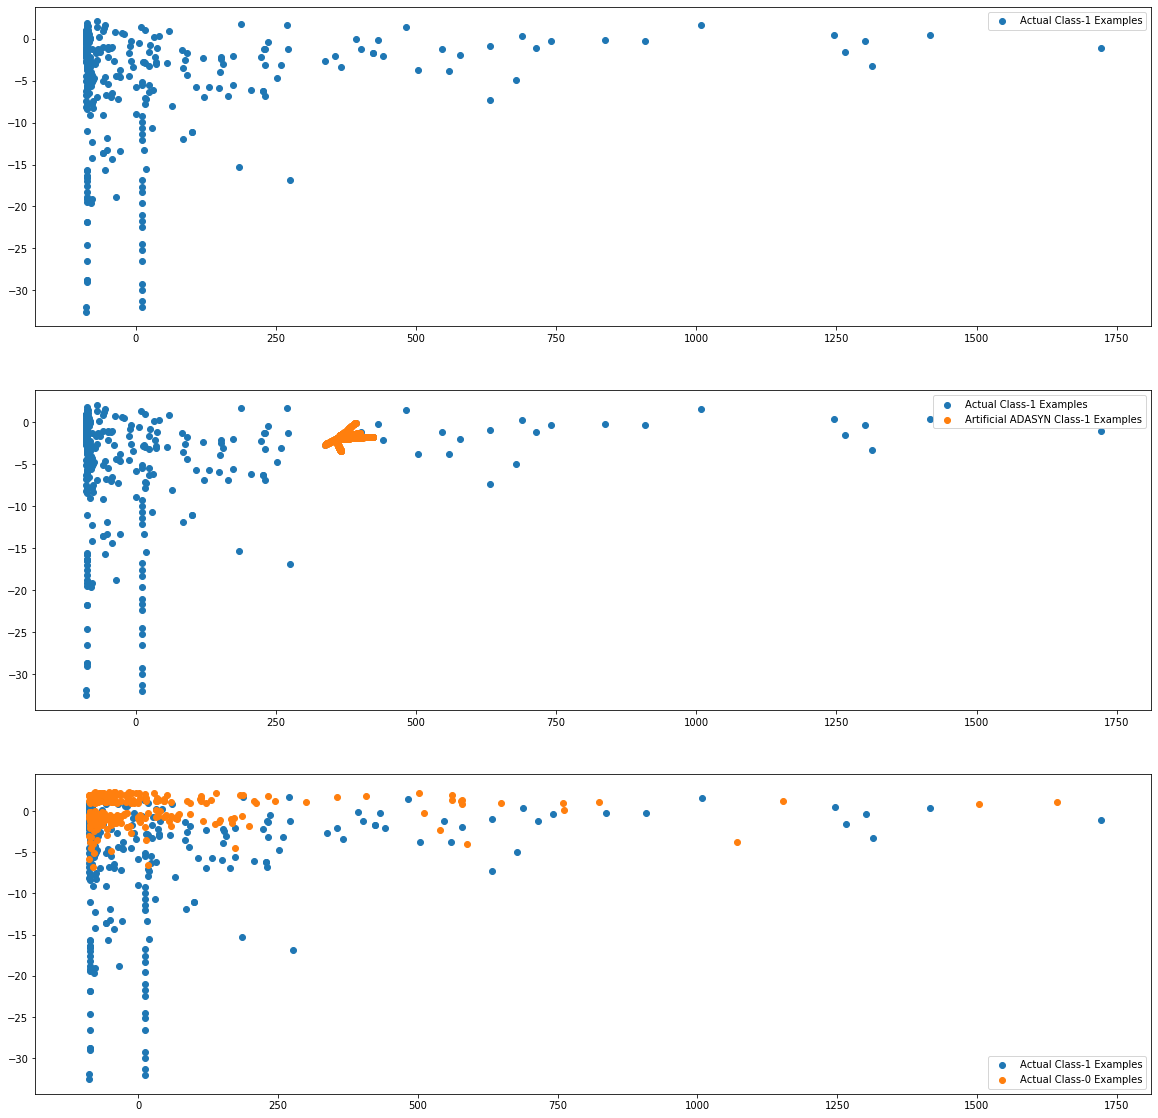

In [25]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### 16. Logistic Regression Using ADASYN

In [ ]:
#Building Logistic Regression Model with hyperparameter tuning on adasyn Data Set
from sklearn.model_selection import GridSearchCV
penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid_logit_adasyn = GridSearchCV(estimator=logistic,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1)
grid_logit_adasyn_result = grid_logit_adasyn.fit(X_train_adasyn,y_train_adasyn)

print('Best Score: ', grid_logit_adasyn_result.best_score_)
print('Best Params: ', grid_logit_adasyn_result.best_params_)

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric
confusion = metrics.confusion_matrix(y_test, grid_logit_smote_result.predict(X_test))
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(TP/(TP+FN))
# Calculate the specificity

print(TN/(TN+FP))

#print the optimum value of hyperparameters


### 17. KNN Using ADASYN

In [ ]:
#Building knn Model with hyperparameter tuning on adasyn Data Set
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
grid_knn_adasyn = GridSearchCV(neigh, 
                   hyperparameters, cv=5)
grid_knn_adasyn_result = grid_knn_adasyn.fit(X_train_adasyn,y_train_adasyn)
print('Best Score: ', grid_knn_adasyn_result.best_score_)
print('Best Params: ', grid_knn_adasyn_result.best_params_)
#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric
confusion = metrics.confusion_matrix(y_test, grid_knn_adasyn_result.predict(X_test))
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(TP/(TP+FN))
# Calculate the specificity

print(TN/(TN+FP))

#print the optimum value of hyperparameters


### 18. SVM Using ADASYN

In [ ]:
# defining parameter range
#Building svc Model with hyperparameter tuning on adasyn Data Set
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid_svc_adasyn = GridSearchCV(svc_clas, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid_svc_adasyn_result = grid_svc_adasyn.fit(X_train_adasyn, y_train_adasyn) 
print('Best Score: ', grid_svc_adasyn_result.best_score_)
print('Best Params: ', grid_svc_adasyn_result.best_params_)

#print the evaluation result by choosing a evaluation metric
confusion = metrics.confusion_matrix(y_test, grid_svc_adasyn_result.predict(X_test))
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(TP/(TP+FN))
# Calculate the specificity

print(TN/(TN+FP))

#print the optimum value of hyperparameters

### 19. Decision Tree Using ADASYN

In [ ]:
#Building decision tree with hyperparameter tuning on adasyn Data Set
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
grid_decision_tree_adasyn = GridSearchCV(estimator, param_grid, cv=5)
grid_decision_tree_adasyn_result = grid_decision_tree_adasyn.fit(X_train_adasyn, y_train_adasyn)
print('Best Score: ', grid_decision_tree_adasyn_result.best_score_)
print('Best Params: ', grid_decision_tree_adasyn_result.best_params_)
confusion = metrics.confusion_matrix(y_test, grid_decision_adasyn_result.predict(X_test))
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

TP/(TP+FN)
# Calculate the specificity

TN/(TN+FP)

### 20. Random Forest Using ADASYN

In [ ]:
#Building random_forest  Model with hyperparameter tuning on adasyn Data Set
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

grid_random_forest_adasyn = GridSearchCV(clf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
grid_random_forest_adasyn_result = grid_random_forest_adasyn.fit(X_train_adasyn, y_train_adasyn)

print('Best Score: ', grid_random_forest_adasyn_result.best_score_)
print('Best Params: ', grid_random_forest_adasyn_result.best_params_)

#print the evaluation result by choosing a evaluation metric
confusion = metrics.confusion_matrix(y_test, grid_random_forest_adasyn_result.predict(X_test))
print(confusion)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Calculate the sensitivity

print(TP/(TP+FN))
# Calculate the specificity

print(TN/(TN+FP))

#print the optimum value of hyperparameters

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [ ]:
# perform the best oversampling method on X_train & y_train

clf_new1 = grid_random_forest_adasyn.fit()  #initialise the model with optimum hyperparameters
clf_new1.fit(X_train_adasyn,y_train_adasyn) # fit on the balanced dataset
 --> #print the evaluation score on the X_test by choosing the best evaluation metric

### Print the important features of the best model to understand the dataset

In [ ]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [ ]:
print('Train auc =', metrics.roc_auc_score(_________)
fpr, tpr, thresholds = metrics.roc_curve(_________)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

### *************************************************** END OF CASE STUDY *********************************************************